<a href="https://colab.research.google.com/github/Montygogetter/Neural-network-projects/blob/main/HandwrittenDigitClassificationMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/11
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7288 - loss: 0.9377 - val_accuracy: 0.9362 - val_loss: 0.2197
Epoch 2/11
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9438 - loss: 0.1888 - val_accuracy: 0.9620 - val_loss: 0.1336
Epoch 3/11
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9655 - loss: 0.1158 - val_accuracy: 0.9647 - val_loss: 0.1209
Epoch 4/11
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9740 - loss: 0.0870 - val_accuracy: 0.9703 - val_loss: 0.1021
Epoch 5/11
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9803 - loss: 0.0651 - val_accuracy: 0.9714 - val_loss: 0.0964
Epoch 6/11
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9851 - loss: 0.0482 - val_accuracy: 0.9722 - val_loss: 0.0952
Epoch 7/11
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9888 - loss: 0.0367 - val_accuracy: 0.9743 - val_loss: 0.0931
Epoch 8/11
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9908 - loss: 0.

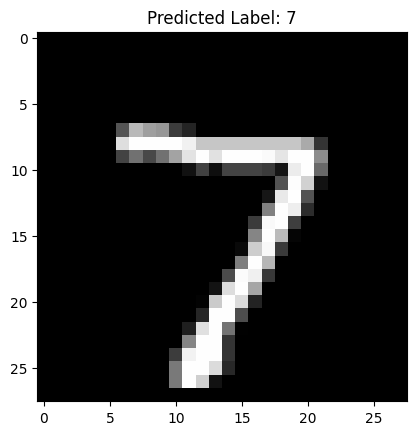

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten 28x28 images into vectors of size 784
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
# Build the model
model = Sequential([
    Dense(158, activation='sigmoid', input_shape=(784,)),  # Hidden layer with 128 neurons
    Dense(94, activation='sigmoid'),
    Dense(77, activation='sigmoid'),# Hidden layer with 64 neurons
    Dense(10, activation='softmax')                    # Output layer with 10 neurons (one per digit)
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
history = model.fit(x_train, y_train, epochs=11, validation_split=0.2, batch_size=22)
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")
# Predict on a test sample
predictions = model.predict(x_test)

# Display the first test image and prediction
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted Label: {np.argmax(predictions[0])}")
plt.show()


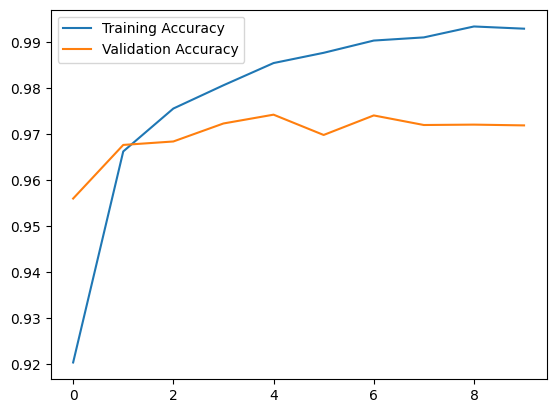

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

